In [1]:
import pandas as pd

df = pd.read_csv('../data/cleaned_PONA_data.csv',index_col=0)
for i in df.columns:
    df[i] = pd.to_numeric(df[i].values.reshape(-1),errors='coerce') 
df

,n-P值,i-P值,n+i P值,Aromatics,N,O,乙烯產量,丙烯產量
日期,,,,,,,,
2011-01-01,37.37,37.02,74.39,7.48,14.62,0.38,2027.790,1013.428
2011-01-02,37.55,38.12,75.67,6.57,15.11,0.67,2037.689,1000.636
2011-01-03,37.55,38.12,75.67,6.57,15.11,0.67,2033.379,1032.877
2011-01-04,38.38,40.75,79.13,5.77,12.11,0.67,2092.455,1030.667
2011-01-05,38.38,40.75,79.13,5.77,12.11,0.67,2074.320,1026.670
...,...,...,...,...,...,...,...,...
2021-08-27,39.25,38.05,77.30,5.25,13.28,1.93,2108.536,1066.904
2021-08-28,39.25,38.05,77.30,5.25,13.28,1.93,2115.991,1066.902
2021-08-29,39.25,38.05,77.30,5.25,13.28,1.93,2110.453,1064.791


In [2]:
# Function to calculate missing values by column# Funct 
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns
# Missing values statistics
missing_values = missing_values_table(df)
missing_values.head(20)

Your selected dataframe has 8 columns.
There are 0 columns that have missing values.


,Missing Values,% of Total Values


In [3]:
df.corr().abs().style.background_gradient()

,n-P值,i-P值,n+i P值,Aromatics,N,O,乙烯產量,丙烯產量
n-P值,1.000000,0.673705,0.910279,0.027416,0.406505,0.080854,0.642747,0.608343
i-P值,0.673705,1.000000,0.919202,0.189076,0.352543,0.224907,0.600744,0.597529
n+i P值,0.910279,0.919202,1.000000,0.120531,0.414110,0.169079,0.679039,0.658905
Aromatics,0.027416,0.189076,0.120531,1.000000,0.325903,0.043095,0.116812,0.105995
N,0.406505,0.352543,0.414110,0.325903,1.000000,0.098399,0.423059,0.429897
O,0.080854,0.224907,0.169079,0.043095,0.098399,1.000000,0.113736,0.127891
乙烯產量,0.642747,0.600744,0.679039,0.116812,0.423059,0.113736,1.000000,0.970923
丙烯產量,0.608343,0.597529,0.658905,0.105995,0.429897,0.127891,0.970923,1.000000


C:\Users\ricky\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 20540 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\ricky\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 20540 missing from current font.
  font.set_text(s, 0, flags=flags)


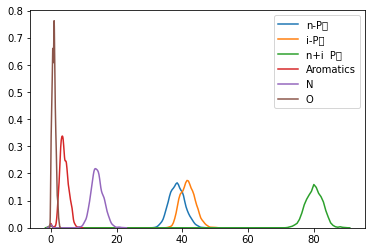

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
for i in df.columns[:-2]:
    sns.kdeplot(df[i],label=i)
plt.show()

C:\Users\ricky\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 20057 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\ricky\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 28911 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\ricky\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 29986 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\ricky\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 37327 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\ricky\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 19993 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\ricky\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 20057 missing from c

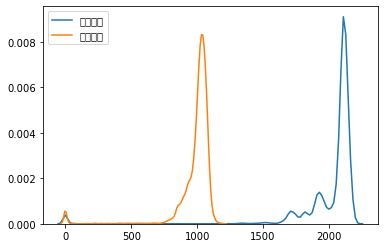

In [6]:
for i in df.columns[-2:]:
    sns.kdeplot(df[i],label=i)
plt.show()